# USA.gov Data from Bitly

This provides us with a feed of data gathered from users who shorten links ending with '.gov' or '.mil'.

In [1]:
path = 'Datasets/example.txt'

open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

The above file is in the JSON format, we can use Python's built in library to handle such files.

In [2]:
import json
records = [json.loads(line) for line in open(path)]

## Counting Time Zones in Pure Python

Suppose we want to find the most occuring time zone which is present in the 'tz' field.

In [3]:
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

From the error message we can see that not all the records have the 'tz' field.

In [4]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [5]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

From the first 10 time zones, we can see that some of them are unknown.

Now to generate the count of the time-zones, we can do it using 2 approaches, using standard Python or using Pandas.

Using standard Python we create a dictionary to store the count values.

In [11]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

We can use advanced Python tools to further make it more breif.

In [9]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # intializes values with 0
    for x in sequence:
        counts[x] += 1
    return counts

In [12]:
counts = get_counts(time_zones)

In [13]:
counts['America/New_York']

1251

In [14]:
len(time_zones)

3440

If we want the top ten time zones according to the count, we have to do some logical conversions.

In [17]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [18]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

We can use the 'collections' library to make this more simpler.

In [19]:
from collections import Counter

counts = Counter(time_zones)

In [20]:
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

## Counting Time Zones with pandas

In [21]:
import pandas as pd

In [22]:
frame = pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [23]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

We can get the time zone count very easily.

In [24]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

We can also visualize this data. But first we need to fill in the missing values.

In [25]:
clean_tz = frame['tz'].fillna('Missing')

In [27]:
clean_tz[clean_tz == ''] = 'Unknown'

In [28]:
tz_counts = clean_tz.value_counts()

In [29]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

We use seaborn for plotting.

In [33]:
import seaborn as sns
sns.set_style('darkgrid')

In [34]:
subset = tz_counts[:10]

<AxesSubplot:>

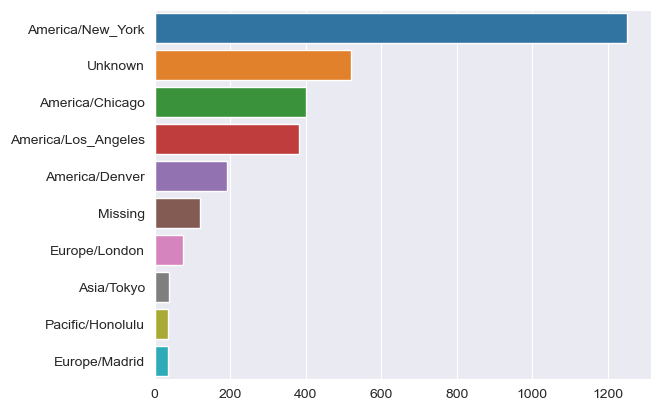

In [35]:
sns.barplot(y=subset.index, x=subset.values)

The field 'a' contains information about the browser, device or application used to perform URL shortening.

In [36]:
frame['a']

0       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                                  GoogleMaps/RochesterNY
2       Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3       Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
                              ...                        
3555    Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...
3556    Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
3557                               GoogleMaps/RochesterNY
3558                                       GoogleProducer
3559    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
Name: a, Length: 3560, dtype: object

In [37]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [38]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [39]:
frame['a'][51][:50]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

As we can see the strings can be very long. Parsing all this information is a daunting task. So we can split the string into the browser info and the user info.

In [40]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])

In [41]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [42]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

Now suppose we want to split the top time zones into Windows and Non-Windows users. First we need to exclude all the missing agent('a') values.

In [43]:
cframe = frame[frame.a.notnull()]

Now we add a new column classifying the records as Windows or not called as 'os'.

In [45]:
import numpy as np
cframe['os'] = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')

C:\Users\delli\AppData\Local\Temp\ipykernel_7556\1774267679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cframe['os'] = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')


In [46]:
cframe['os'][:5]

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

We can now group by timezone and the os.

In [47]:
by_tz_os = cframe.groupby(['tz', 'os'])

In [48]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


Now slecting the top overall time zones.

In [49]:
indexer = agg_counts.sum(1).argsort()

In [50]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

We now slice off the last 10 rows.

In [51]:
count_subset = agg_counts.take(indexer[-10:])

In [52]:
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


Pandas has a method that does the same thing.

In [53]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

We can also plot this data. But first we need to rearrange the data for plotting.

In [54]:
count_subset = count_subset.stack()

In [55]:
count_subset.name = 'total'

In [56]:
count_subset = count_subset.reset_index()

In [57]:
count_subset[:10]

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


<AxesSubplot:xlabel='total', ylabel='tz'>

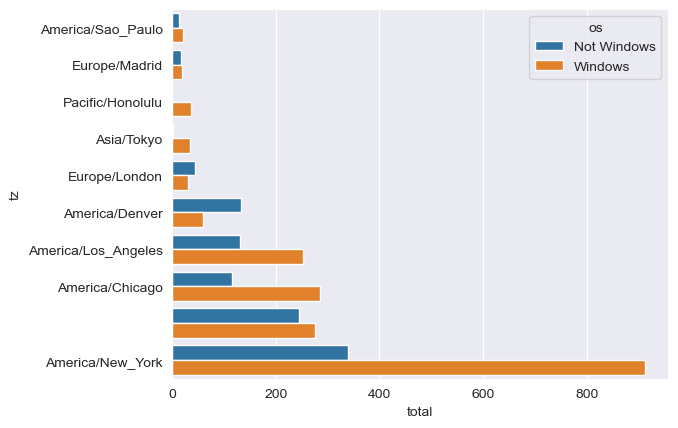

In [58]:
sns.barplot(x='total', y='tz', hue='os', data=count_subset)

This plot does not allow us to see the relative percentages of Windows users to not. We can change this by normalizing the data to sum to 1.

In [59]:
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

In [60]:
results = count_subset.groupby('tz').apply(norm_total)

<AxesSubplot:xlabel='normed_total', ylabel='tz'>

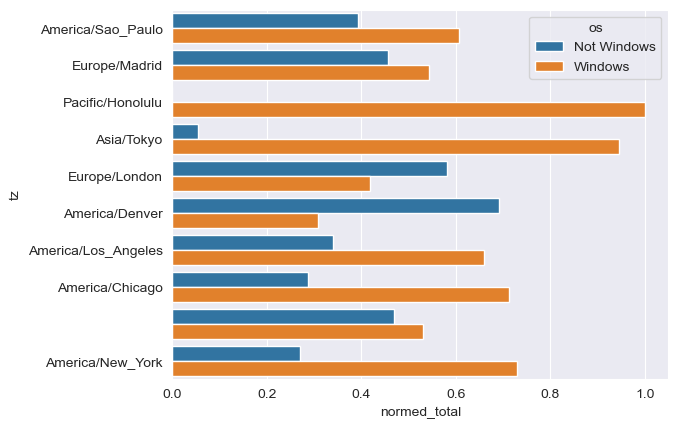

In [62]:
sns.barplot(x='normed_total', y='tz', hue='os', data=results)

The normalized sum could be more effeciently transformed using the transfrom method.

In [63]:
g = count_subset.groupby('tz')

In [64]:
results2 = count_subset.total / g.total.transform('sum')

In [65]:
results2

0     0.393939
1     0.606061
2     0.457143
3     0.542857
4     0.000000
5     1.000000
6     0.054054
7     0.945946
8     0.581081
9     0.418919
10    0.691099
11    0.308901
12    0.340314
13    0.659686
14    0.287500
15    0.712500
16    0.470250
17    0.529750
18    0.270983
19    0.729017
Name: total, dtype: float64

# MoviesLens 1M Dataset

It contains data about movie ratings collected in the late 1990s abd early 2000s. This kind of data is often used and important to ML absed recommendation systems.

In [66]:
import pandas as pd

In [67]:
pd.options.display.max_rows = 10

In [69]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('Datasets/users.dat', sep='::',
                      header=None, names=unames)

C:\Users\delli\AppData\Local\Temp\ipykernel_7556\1963238294.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_table('Datasets/users.dat', sep='::',


In [72]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('Datasets/ratings.dat', sep='::',
                      header=None, names=rnames)

C:\Users\delli\AppData\Local\Temp\ipykernel_7556\2691970669.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_table('Datasets/ratings.dat', sep='::',


In [79]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('Datasets/movies.dat', sep='::',
                      header=None, names=mnames)

C:\Users\delli\AppData\Local\Temp\ipykernel_7556\3459394081.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_table('Datasets/movies.dat', sep='::',


In [81]:
users

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [82]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [83]:
movies

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
2310,2379,Police Academy 2: Their First Assignment (1985),Comedy
2311,2380,Police Academy 3: Back in Training (1986),Comedy
2312,2381,Police Academy 4: Citizens on Patrol (1987),Comedy
2313,2382,Police Academy 5: Assignment: Miami Beach (1988),Comedy


The ages and occupations are coded as integers which indicates groups.

It is difficult to handle data across 3 tables so we merge them together.

In [90]:
data = pd.merge(pd.merge(ratings, users), movies)

In [91]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
644871,5334,127,1,960795494,F,56,13,46140,"Silence of the Palace, The (Saimt el Qusur) (1...",Drama
644872,5420,1843,3,960156505,F,1,19,14850,Slappy and the Stinkers (1998),Children's|Comedy
644873,5433,286,3,960240881,F,35,17,45014,Nemesis 2: Nebula (1995),Action|Sci-Fi|Thriller
644874,5556,2198,3,959445515,M,45,6,92103,Modulations (1998),Documentary


To get the mean movie ratings for each film grouped by gender, we can use the pivot_table method.

In [92]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender',
                                aggfunc='mean')

In [93]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
1-900 (1994),2.000000,3.000000
101 Dalmatians (1961),3.791444,3.500000


We then filter down to the movies that have received at least 250 movie ratings.

We do this by first grouping the data by the movie title and using size() to get the group size of each title.

In [94]:
ratings_by_title = data.groupby('title').size()

In [95]:
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                  37
'Til There Was You (1997)               52
'burbs, The (1989)                     303
1-900 (1994)                             2
101 Dalmatians (1961)                  565
101 Dalmatians (1996)                  364
12 Angry Men (1957)                    616
187 (1997)                              55
2 Days in the Valley (1996)            286
20,000 Leagues Under the Sea (1954)    575
dtype: int64

In [96]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [97]:
active_titles

Index([''burbs, The (1989)', '101 Dalmatians (1961)', '101 Dalmatians (1996)',
       '12 Angry Men (1957)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)', '39 Steps, The (1935)', '54 (1998)',
       ...
       'Wizard of Oz, The (1939)', 'Wolf (1994)', 'Working Girl (1988)',
       'Wrong Trousers, The (1993)', 'Wyatt Earp (1994)',
       'X-Files: Fight the Future, The (1998)', 'Young Frankenstein (1974)',
       'Young Guns (1988)', 'Young Guns II (1990)', 'Zero Effect (1998)'],
      dtype='object', name='title', length=755)

These titles can then be used as index for obtaining the mean ratings.

In [98]:
mean_ratings = mean_ratings.loc[active_titles]

In [99]:
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
2 Days in the Valley (1996),3.488889,3.244813
...,...,...
"X-Files: Fight the Future, The (1998)",3.489474,3.493797
Young Frankenstein (1974),4.289963,4.239177
Young Guns (1988),3.371795,3.425620


To sort the top films among female viewers.

In [100]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [101]:
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
"Usual Suspects, The (1995)",4.513317,4.518248


## Measuring Rating Disagreement

Suppose we want to find the movies that are most devise between men and women.

One way to do this is to add a column having the difference in ratings of men and women for each movie.

In [102]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [103]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [104]:
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Anastasia (1997),3.800000,3.281609,-0.518391
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561
Free Willy (1993),2.921348,2.438776,-0.482573
French Kiss (1995),3.535714,3.056962,-0.478752
Mary Poppins (1964),4.197740,3.730594,-0.467147
Grease 2 (1982),2.243478,1.792553,-0.450925


The above displays the movies preferrd by women. If we want the movies preferred by men then we reverse the order of the rows.

In [105]:
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Exorcist, The (1973)",3.537634,4.067239,0.529605
Barb Wire (1996),1.585366,2.100386,0.515020
Beavis and Butt-head Do America (1996),2.637363,3.135417,0.498054
From Dusk Till Dawn (1996),2.735714,3.232558,0.496844
"Wild Bunch, The (1969)",3.636364,4.128099,0.491736


Now if we want the movies that caused the most disagreement in general then we need to go for variance or standard deviation.

We groupby the title and obtain std deviation.

In [106]:
rating_std_by_title = data.groupby('title')['rating'].std()

Filtering down to ratings >= 250.

In [107]:
rating_std_by_title = rating_std_by_title.loc[active_titles]

In [108]:
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Wes Craven's New Nightmare (1994)        1.237630
Serial Mom (1994)                        1.222715
Waterboy, The (1998)                     1.219092
Toys (1992)                              1.218889
Name: rating, dtype: float64

# US Baby Names 1880 - 2010

This dataset contains data about the babynames of babies in the US in the years 1880 - 2010.

In [1]:
import pandas as pd

In [5]:
names1880 = pd.read_csv('Datasets/babynames/yob1880.txt',
                        names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


These files contain names that have at least 5 occurences in each year.

We can group by sex and find the total sum of all according to the sex.

In [6]:
names1880.groupby('sex').births.sum()

sex
F     90994
M    110490
Name: births, dtype: int64

Since the dataset is split into files for each induvidual year, we need to assemble all of it into a single dataframe and we can also add a 'year' attribute.

In [7]:
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'Datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)

Now we concatenate everything to a single dataframe.

In [8]:
names = pd.concat(pieces, ignore_index=True)

In [9]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1692251,Zymaire,M,5,2010
1692252,Zyonne,M,5,2010
1692253,Zyquarius,M,5,2010
1692254,Zyran,M,5,2010


We can now aggregate the data at the year and sex.

In [10]:
total_births = names.pivot_table('births', index='year',
                                 columns='sex', aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1900092,2054077
2007,1921385,2074138
2008,1889483,2038689
2009,1835518,1981950
2010,1775857,1917024


<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

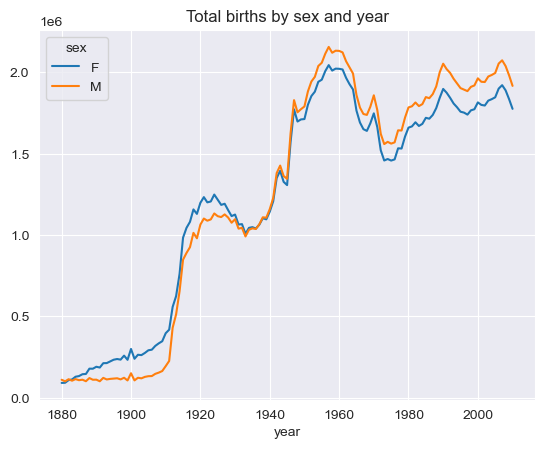

In [13]:
import seaborn as sns
sns.set_style('darkgrid')
total_births.plot(title='Total births by sex and year')

Now insert a column 'prop' with the fraction of babies given a name realtive to the total number of births.

In [16]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

In [17]:
names = names.groupby(['year', 'sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1692251,Zymaire,M,5,2010,0.000003
1692252,Zyonne,M,5,2010,0.000003
1692253,Zyquarius,M,5,2010,0.000003
1692254,Zyran,M,5,2010,0.000003


When we are doing a groupby operation, it is often valuable to check/verify the values.

In [18]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

Now we can extract the top 1000 names for each sex/year combination.

In [21]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
# drop the group index
top1000.reset_index(inplace=True, drop=True)

In [22]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Bailey,M,196,2010,0.000102
261873,Destin,M,196,2010,0.000102
261874,Eliezer,M,196,2010,0.000102
261875,Enoch,M,196,2010,0.000102


We use the above data for further analysis.

## Analyzing Naming Trends

Splitting the data into boys and girls.

In [23]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

We can plot the number of name births for each year but first we form a pivot table of the totla number of births by year and name.

In [24]:
total_births = top1000.pivot_table('births', index='year',
                                   columns='name', aggfunc=sum)
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3744.0,NaN,8299.0,NaN,NaN,298.0,NaN,404.0,440.0,...,NaN,5153.0,2852.0,531.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3958.0,NaN,8941.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4936.0,3039.0,527.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,957.0,4041.0,219.0,8541.0,NaN,NaN,321.0,NaN,344.0,401.0,...,NaN,4781.0,3448.0,493.0,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6871 entries, Aaden to Zuri
dtypes: float64(6871)
memory usage: 6.9 MB


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

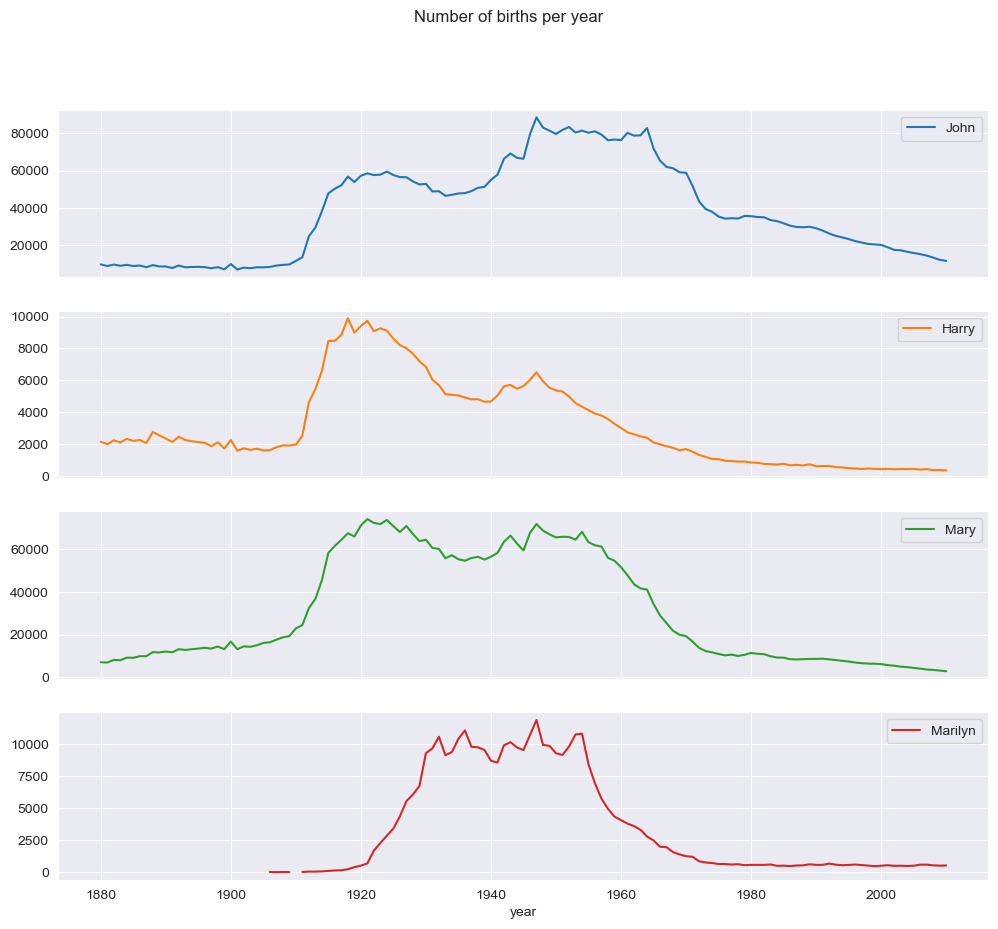

In [26]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), title='Number of births per year')

From the above we can maybe conclude that these names have grown out of favor with the american population, but it is actually morecomlicated than that.

### Measuring the increase in naming diversity

One explanation for the dcrease in the plots is that fewer parents are choosing common names for their children.

One way to measure this is the proportion of births in the top 1000 names aggregated with respect to year and sex.

In [28]:
table = top1000.pivot_table('prop', index='year',
                            columns='sex', aggfunc=sum)

<AxesSubplot:title={'center':'Sum of table1000.prop by year and sex'}, xlabel='year'>

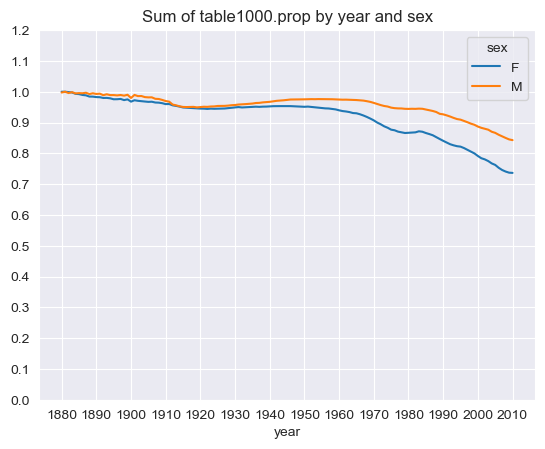

In [31]:
import numpy as np
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

We can see that there seems to be an increasing name diversity.

Another interesting metric is the number of distinct names, taken in order of popularity from the highest to lowest, in the top 50% of births.

In [32]:
df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,22136,2010,0.011547
260878,Ethan,M,18004,2010,0.009392
260879,Michael,M,17359,2010,0.009055
260880,Jayden,M,17185,2010,0.008964
260881,William,M,17054,2010,0.008896
...,...,...,...,...,...
261872,Bailey,M,196,2010,0.000102
261873,Destin,M,196,2010,0.000102
261874,Eliezer,M,196,2010,0.000102
261875,Enoch,M,196,2010,0.000102


After sorting in descending order we want to know how many of the most popular names does it take to reach 50% . 

In [33]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [34]:
prop_cumsum[:10]

260877    0.011547
260878    0.020939
260879    0.029994
260880    0.038958
260881    0.047854
260882    0.056596
260883    0.065180
260884    0.073447
260885    0.081554
260886    0.089638
Name: prop, dtype: float64

In [36]:
prop_cumsum.values.searchsorted(0.5) + 1

117

Since arrays are 0 indexed we add one extra.

Now checking the same for 1900.

In [37]:
df = boys[boys.year == 1900]

In [38]:
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [39]:
in1900.values.searchsorted(0.5) + 1

25

As we can see the value is musch smaller for 1900.

We can now generalize this operation for each year/sex combination.

In [40]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

In [41]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [42]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<AxesSubplot:title={'center':'Number of popular names in top 50%'}, xlabel='year'>

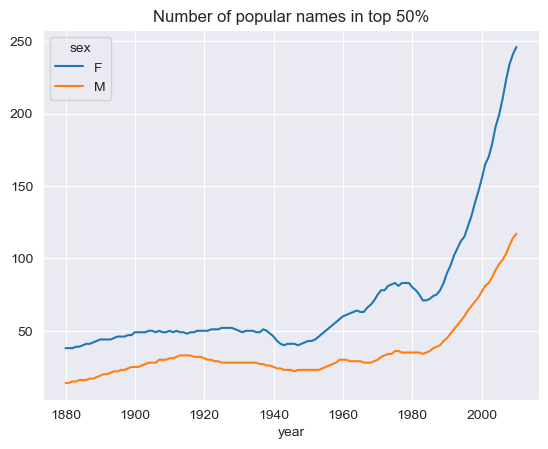

In [43]:
diversity.plot(title='Number of popular names in top 50%')

From the above we can see that girls names have always been more diverse than boy names and they have increased over time.

### The 'last letter' revolution

It was observed by a researcher that the distribution of boy names by final letter has changed significantly over the last 100 years.

To see this, we aggregate by yearn sex and final letter.

In [46]:
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters,
                          columns=['sex', 'year'], aggfunc=sum)
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33381.0  34080.0  40399.0  41913.0  48089.0  49616.0  53883.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4783.0   5566.0   5701.0   6602.0   6623.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2910.0   3527.0   3848.0   4807.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3575.0   3836.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2038.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2824.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10467.0  10404.0  12143.0  12063.0  13918.0  13927.0  14932.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
a            48942.0  59440.0  58631.0  ...   39168.0   38855.0   37870.0   
b                NaN      NaN      NaN  ...   51001.0   49334.0   48121.0   
c                NaN      NaN      NaN  ...   27133.0   27265.0   27726.0   
d             1027.0   1298.0   1374.0  ...   60916.0   55925.0   53460.0   
e            54353.0  66748.0  66662.0  ...  145507.0  144785.0  144925.0   
f                NaN      NaN      NaN  ...    1758.0    1818.0    1820.0   
g               25.0     44.0     28.0  ...    2155.0    2085.0    2014.0   
h             7141.0   8630.0   8825.0  ...   86075.0   88181.0   88350.0   
i              105.0    141.0    134.0  ...   21034.0   23659.0   26057.0   
j                NaN      NaN      NaN  ...    1072.0    1088.0    1208.0   
k               19.0     21.0     22.0  ...   42501.0   42061.0   42321.0   
l             6174.0   7900.0   8395.0  ...  153822.0  153668.0  154067.0   
m               90.0    123.0    137.0  ...   42016.0   42716.0   42824.0   
n             5512.0   6832.0   7103.0  ...  616566.0  630825.0  664080.0   
o               97.0    134.0    142.0  ...   82192.0   83245.0   85494.0   
p                NaN      NaN      NaN  ...    3420.0    3164.0    2985.0   
q                NaN      NaN      NaN  ...     603.0     619.0     586.0   
r              910.0   1207.0   1214.0  ...  165470.0  164951.0  170008.0   
s             2803.0   3581.0   3569.0  ...  143951.0  139775.0  138775.0   
t             3140.0   3816.0   3784.0  ...

Now we select 3 representative years.

In [48]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108399.0  691274.0  677049.0    977.0    5214.0   28881.0
b                 NaN     694.0     455.0    411.0    3912.0   39290.0
c                 5.0      49.0     957.0    482.0   15457.0   23356.0
d              6751.0    3731.0    2644.0  22113.0  262117.0   44843.0
e            133601.0  435027.0  316855.0  28665.0  178764.0  130296.0

Now we normalize the data, having the proportion of total births for each sex ending in each letter.

In [49]:
subtable.sum()

sex  year
F    1910     396505.0
     1960    2022015.0
     2010    1775857.0
M    1910     194210.0
     1960    2132133.0
     2010    1917024.0
dtype: float64

In [50]:
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273386  0.341874  0.381252  0.005031  0.002445  0.015066
b                 NaN  0.000343  0.000256  0.002116  0.001835  0.020495
c            0.000013  0.000024  0.000539  0.002482  0.007250  0.012183
d            0.017026  0.001845  0.001489  0.113861  0.122937  0.023392
e            0.336947  0.215145  0.178424  0.147598  0.083843  0.067968
f                 NaN  0.000010  0.000055  0.000783  0.004329  0.001206
g            0.000144  0.000157  0.000377  0.002260  0.009488  0.001407
h            0.051530  0.036221  0.075985  0.045564  0.037913  0.051820
i            0.001526  0.039967  0.031697  0.000844  0.000610  0.022670
j                 NaN       NaN  0.000093       NaN       NaN  0.000772
k            0.000121  0.000155  0.000355  0.036579  0.049376  0.018533
l            0.043187  0.033867  0.026390  0.065022  0.104890  0.070457
m            0.001200  0.008613  0.002599  0.058045  0.033834  0.024705
n            0.079237  0.130672  0.140056  0.143386  0.152525  0.362416
o            0.001672  0.002439  0.001247  0.017064  0.012844  0.042564
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013395  0.006765  0.018046  0.064471  0.031043  0.087392
s            0.039036  0.012764  0.013337  0.130797  0.102701  0.065159
t            0.027432  0.015198  0.007838  0.072885  0.065645  0.022861
u            0.000683  0.000575  0.000416  0.000124  0.000057  0.001228
v                 NaN  0.000060  0.000117  0.000113  0.000036  0.001449
w            0.000020  0.000031  0.001190  0.006323  0.007708  0.016184
x            0.000015  0.000037  0.000729  0.003965  0.001851  0.008599
y            0.110975  0.152556  0.116762  0.077344  0.160983  0.058196
z            0.002436  0.000658  0.000700  0.000170  0.000184  0.001829

We can now make a bar plot for each letter for each sex in ecah of the years.

In [51]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Female'}, xlabel='last_letter'>

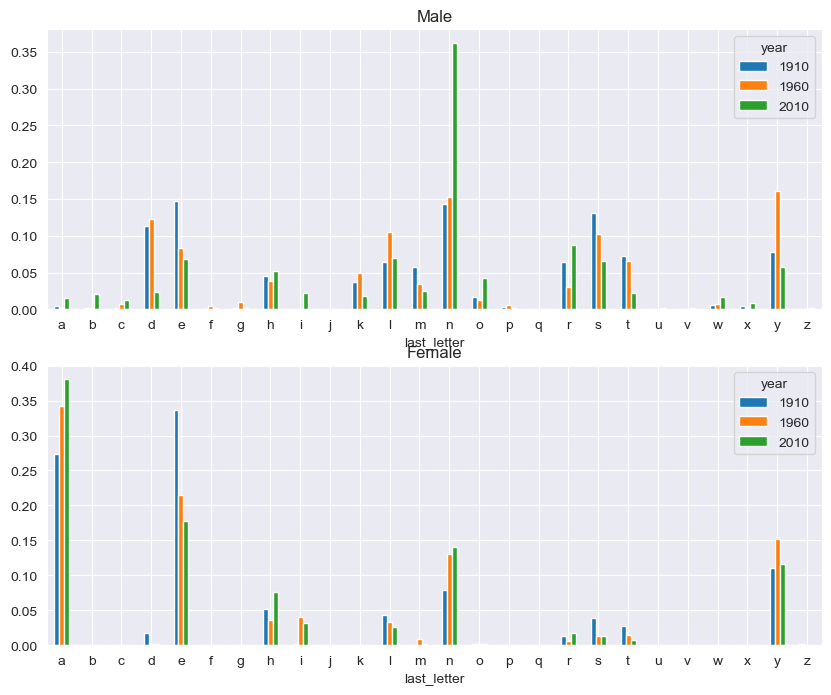

In [52]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title="Male")
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title="Female")

We can see that boy names ending in 'n' have experienced a significant growth since the 1960's.

Now selecting a subset of letters for the boy names.

In [53]:
letter_prop = table / table.sum()

In [54]:
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T

In [55]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083242,0.153212,0.077455
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


<AxesSubplot:xlabel='year'>

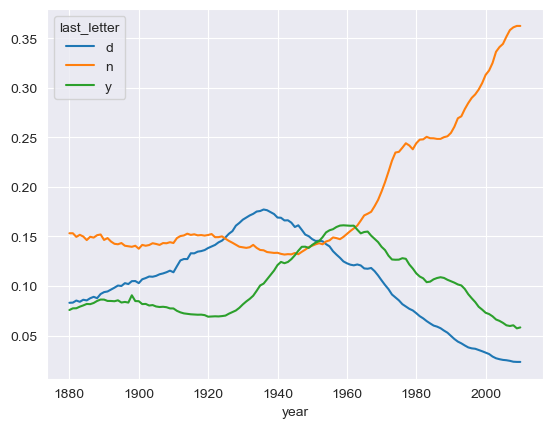

In [56]:
dny_ts.plot()

### Boy names that became girl names (and vice versa)

One example of sex cahnge on names is Lesley or Leslie.

In [57]:
all_names = pd.Series(top1000.name.unique())

In [58]:
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4264    Leslee
4732     Lesli
6107     Lesly
dtype: object

We can now find the sum of births with those names.

In [59]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [60]:
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35036
Lesli        929
Leslie    370574
Lesly      10072
Name: births, dtype: int64

Now aggregating by sex and year and noramlizing within year.

In [61]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc=sum)

In [62]:
table = table.div(table.sum(1), axis=0)

In [63]:
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


<AxesSubplot:xlabel='year'>

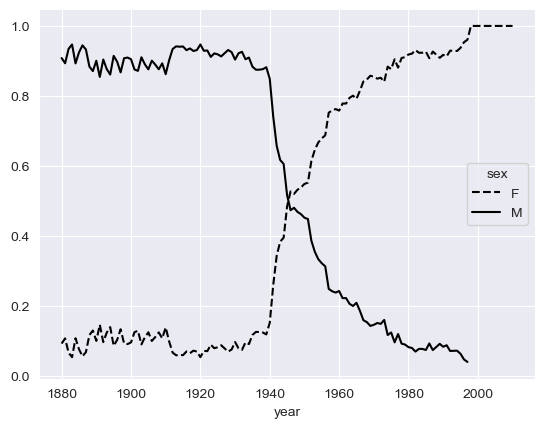

In [64]:
table.plot(style={'M': 'k-', 'F': 'k--'})

We can see that name change from a Male name to a Female name occured in the mid-1940's.

# USDA Food Database

In [1]:
import json

In [2]:
db = json.load(open('Datasets/database.json'))

In [3]:
len(db)

6636

Each entry in db is a dict containing all the data for a single food.

In [4]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [5]:
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [8]:
import pandas as pd
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients[:7]

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy


We can specify the fields we want to extract.

In [9]:
info_keys = ['description', 'group', 'id', 'manufacturer']

In [10]:
info = pd.DataFrame(db, columns=info_keys)
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [11]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


We can see the distribution of the food groups.

In [13]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

Now if we want to do some analysis on the nutrient data, we convert all the nutrient data to a single table.

In [28]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)
    
nutrients = pd.concat(nutrients, ignore_index=True)

In [29]:
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


We can drop the duplicates in the data.

In [30]:
nutrients.duplicated().sum()

14179

In [31]:
nutrients = nutrients.drop_duplicates()

We are now renaming the columns for better clarity.

In [32]:
col_mapping = {'description': 'food',
               'group': 'fgroup'}

In [33]:
info = info.rename(columns=col_mapping, copy=False)

In [34]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [35]:
col_mapping = {'description': 'nutrient',
               'group': 'nutgroup'}

In [36]:
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

,value,units,nutrient,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [37]:
info

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
...,...,...,...,...
6631,"Bologna, beef, low fat",Sausages and Luncheon Meats,42161,
6632,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,42173,
6633,"Babyfood, juice, pear",Baby Foods,43408,None
6634,"Babyfood, dessert, banana yogurt, strained",Baby Foods,43539,None


We can now merge info with nutrients.

In [38]:
ndata = pd.merge(nutrients, info, on='id', how='outer')

In [39]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [41]:
ndata.iloc[30000]

value                                             0.04
units                                                g
nutrient                                       Glycine
nutgroup                                   Amino Acids
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

Now we can make a plot of the median value of Zinc content by food group and nutrient type.

In [42]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)

<AxesSubplot:ylabel='fgroup'>

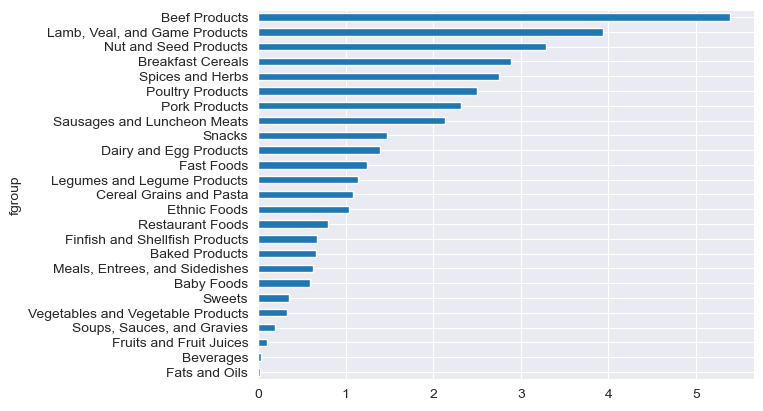

In [48]:
import seaborn as sns
sns.set_style('darkgrid')
result['Zinc, Zn'].sort_values().plot(kind='barh')

We can now find which food is most dense in each nutrient.

In [51]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

In [52]:
get_maximum = lambda x: x.loc[x.value.idxmax()]
get_minimum = lambda x: x.loc[x.value.idxmin()]

In [53]:
max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]
max_foods = max_foods.food.str[:50]

The resulting dataframe is too large to display so we display only the 'Amino Acids' nutrient group.

In [56]:
max_foods.loc['Amino Acids']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 

# 2012 Fedral Election Comission Database

This dataset contains data on the political campaigns of the 2012 American Fedral Election.

In [57]:
fec = pd.read_csv('Datasets/P00000001-ALL.csv')

C:\Users\delli\AppData\Local\Temp\ipykernel_8208\2856038196.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  fec = pd.read_csv('Datasets/P00000001-ALL.csv')


In [58]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

A sample record looks like this.

In [59]:
fec.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                        50.0
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

There is no political party affiliaion in the data, so it will be useful to add it.

First we need to identify all the unique candidates.

In [60]:
unique_cands = fec.cand_nm.unique()

In [61]:
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [62]:
unique_cands[2]

'Obama, Barack'

We can now indicate the party associations manually using a dictionary.

In [63]:
parties = {'Bachmann, Michelle': 'Republican',
 'Cain, Herman': 'Republican',
 'Gingrich, Newt': 'Republican',
 'Huntsman, Jon': 'Republican',
 'Johnson, Gary Earl': 'Republican',
 'McCotter, Thaddeus G': 'Republican',
 'Obama, Barack': 'Democrat',
 'Paul, Ron': 'Republican',
 'Pawlenty, Timothy': 'Republican',
 'Perry, Rick': 'Republican',
 "Roemer, Charles E. 'Buddy' III": 'Republican',
 'Romney, Mitt': 'Republican',
 'Santorum, Rick': 'Republican'}

We can now map this using the map method.

In [64]:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [65]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [66]:
fec['party'] = fec.cand_nm.map(parties)

In [67]:
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

We will also only consider the positive contributors in the contc_receipt_amt column.

In [68]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [69]:
fec = fec[fec.contb_receipt_amt > 0]

Since Barack Obama and Mitt Romney were the main 2 candidates, we will create a subset that just has them.

In [70]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

## Donation Statistics by Occupation and Employer

Donations by occupation is also another interesting statistic. Depending on the occupation of a person, the person tends to donate more to either one of the parties.

In [71]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

We are now cleaning up the occupation column.

In [72]:
occ_mapping = {
 'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
 'INFORMATION REQUESTED' : 'NOT PROVIDED',
 'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
 'C.E.O.': 'CEO'
}

In [73]:
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

C:\Users\delli\AppData\Local\Temp\ipykernel_8208\115578575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fec.contbr_occupation = fec.contbr_occupation.map(f)


Now we create a pivot table to aggregate the data by party and occupation and filter the donation to at least $2 million overall.

In [74]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')

In [75]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
CEO,2074974.79,4211040.52
CONSULTANT,2459912.71,2544725.45
ENGINEER,951525.55,1818373.70
EXECUTIVE,1355161.05,4138850.09
HOMEMAKER,4248875.80,13634275.78
INVESTOR,884133.00,2431768.92
LAWYER,3160478.87,391224.32
MANAGER,762883.22,1444532.37


<AxesSubplot:ylabel='contbr_occupation'>

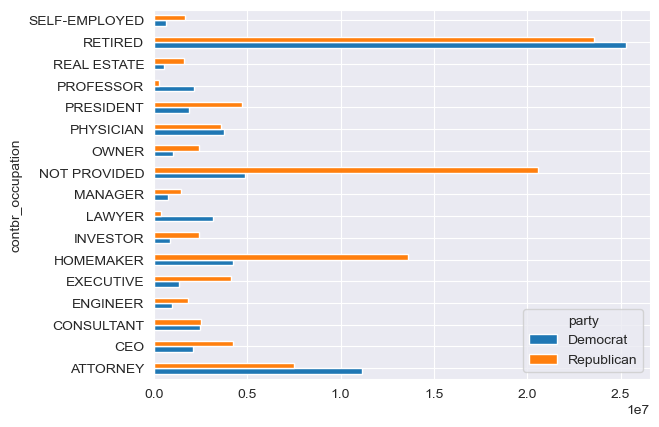

In [76]:
over_2mm.plot(kind='barh')

We might want to know the top contributor to Obama and Romney. For this we group by candidate and sort by top.

In [77]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

In [78]:
grouped = fec_mrbo.groupby('cand_nm')

In [79]:
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

In [80]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                     

## Bucketing Daonation Amounts

In [82]:
import numpy as np
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])

In [85]:
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)

In [86]:
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64, right]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

We can now group the data for Obama and Romney.

In [87]:
grouped = fec_mrbo.groupby(['cand_nm', labels])

In [89]:
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


From this we can see that Obama received significantly more small donations than Romney.

We can also see at as a percentage by some modifications.

In [91]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)

In [92]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)

In [93]:
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,0.000000
"(1000000, 10000000]",1.000000,0.000000


<AxesSubplot:ylabel='contb_receipt_amt'>

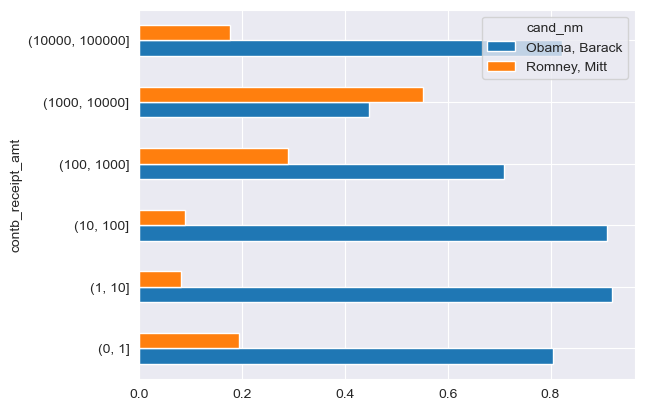

In [94]:
normed_sums[:-2].plot(kind='barh')

## Donation Statistic by State

In [95]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])

In [97]:
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)

In [98]:
totals = totals[totals.sum(1) > 100000]

In [99]:
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


Now to get the relative percentage.

In [100]:
percent = totals.div(totals.sum(1), axis=0)

In [102]:
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224
